In [1]:
# Libraries
from IPython.display import IFrame
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde

# Data Graphics
* Combined use of points, lines, a coordinate system, numbers, symbols, words, shading and color to display information
* Surprisingly recent invention
    - 1750's that statistical graphics length and area to show, quantity, time-series, scatter plots and multivariate displays were used

### Modern graphics are instruments for reasoning about quantitative information
* Good graphics allow large collections of data to be turned into actionable information
* In science, making **easy to interpret, honest graphical representations of information** is the most effective way of communicating scientific information

# What does an Excellent Graphic Do?

* Show the data

* Allow the observer to extract information without thinking about the methodology or design $\rightarrow$ good design is unnoticeable

* Presents a large amount of data in a small space

* Encourages the eye to make compare important pieces of information

* Reveal data at several levels of detail

* Does not distort the data

* Reinforces information in the text

# Graphics can be more informative than statistics!

# Example of how graphics can be used
Famous dot of Dr. John Snow who showed deaths from Cholera in central London for September 1854
![title](images/snow.png)
## What does this graphic tell you?

# Adding a Spatial Dimension to a Time Series
* More information can be displayed by combining multiple data forms
* You should design figures so information can be extracted without reading

<img src="images/poster_OrigMinard.gif" width="1200">

Minard’s graphic is quite clever because of its ability to combine all of dimensions: loss of life at a time and location, temperature, geography, historical context, into one single graphic. 

* Shows when Napoleon's army split by branching the graph
* Adds thin lines to represent when the army had to cross rivers
* Shows events with labels, changes in line width, easy for the eye to see where important events occur
* Correlates secondary information (temperature in a graphical way) $\rightarrow$ makes it so covariances can be identified

# Principles of Graphical Excellence
* Presentation of data needs to consider *substance, statistics, and design*

* Complex ideas should be communicated with *clarity, precision, and efficiency*

* Gives the viewer the *greatest amount of information, in the shortest amount of time, using the least amount of ink*

# Graphical Integrity
Graphics are just like words, they can be used to deceive

## What is wrong with this figure?
<img src="images/Army_Figure.png" width="1200">

* Negative data not represented well

# Bar charts
* Bar charts show representation within groups that conceals the data
* Should only be used for histograms
<img src="images/Bar_Chart.jpeg" width="800">

# Color scales

* Colorful
* pretty
* should be sequential
* accurately represents the values color to brain
* print in grayscale
* good for colorblind

# Why colormaps matter?
Your eyes interpretation of the colormap represents the scale of the y-axis. <br>
**Use of inappropriate colormap is like having a non-linear y-axis!**
![title](images/heart_disease.png)

# The most common colormap JET
![title](images/jet.png)

# This is what JET looks like
![title](images/Mona_1.png)

# Matlab's Default [Parula]
![title](images/parula.png)

# Perceptually uniform colormaps [Viridis]
![title](images/viridis.png)

# More details about perceptually correct colormaps

In [2]:
IFrame(src='https://bids.github.io/colormap/', width=1000, height=1000)

# Choosing Colors for your Figures

In [3]:
IFrame(src='http://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3', width=1000, height=1000)

# Types of Graphs

In [4]:
IFrame(src='https://www.data-to-viz.com/', width=1000, height=1200)

# Violin Plots
* Like a box plot but provides a deeper understanding of data density
* Good when you have large datasets

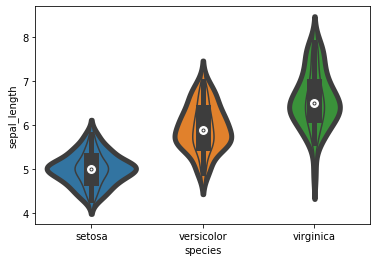

In [5]:
# library & dataset
import seaborn as sns
df = sns.load_dataset('iris')
 
# Change line width
sns.violinplot( x=df["species"], y=df["sepal_length"], linewidth=5)
 
# Change width
sns.violinplot( x=df["species"], y=df["sepal_length"], width=0.3)

# 2D Density Plot
* Used to compare 2D quantitative information
* Good for small data sets
* When the density of data is high (shouldn't use a scatter plot)

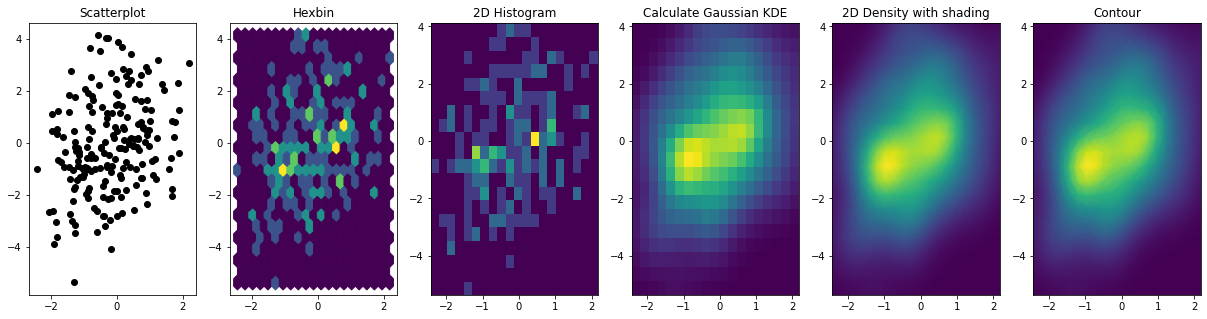

In [6]:
# Create data: 200 points
data = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 3]], 200)
x, y = data.T
 
# Create a figure with 6 plot areas
fig, axes = plt.subplots(ncols=6, nrows=1, figsize=(21, 5))
 
# Everything sarts with a Scatterplot
axes[0].set_title('Scatterplot')
axes[0].plot(x, y, 'ko')
# As you can see there is a lot of overplottin here!
 
# Thus we can cut the plotting window in several hexbins
nbins = 20
axes[1].set_title('Hexbin')
axes[1].hexbin(x, y, gridsize=nbins, cmap=plt.cm.viridis)
 
# 2D Histogram
axes[2].set_title('2D Histogram')
axes[2].hist2d(x, y, bins=nbins, cmap=plt.cm.viridis)
 
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k = kde.gaussian_kde(data.T)
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# plot a density
axes[3].set_title('Calculate Gaussian KDE')
axes[3].pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.viridis)
 
# add shading
axes[4].set_title('2D Density with shading')
axes[4].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.viridis)
 
# contour
axes[5].set_title('Contour')
axes[5].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.viridis)
axes[5].contour(xi, yi, zi.reshape(xi.shape) )


# Correlogram
A correlogram or correlation matrix allows to analyse the relationship between each pair of numerical variables of a matrix.

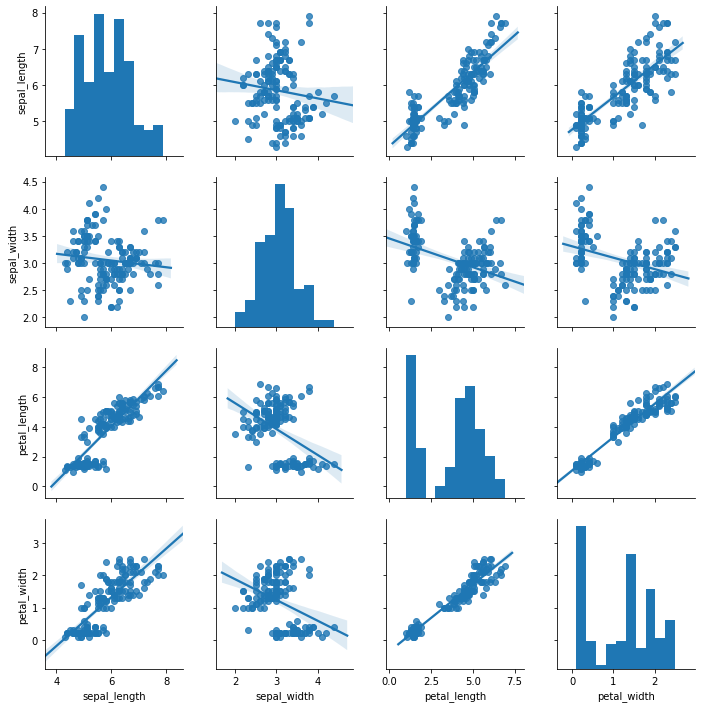

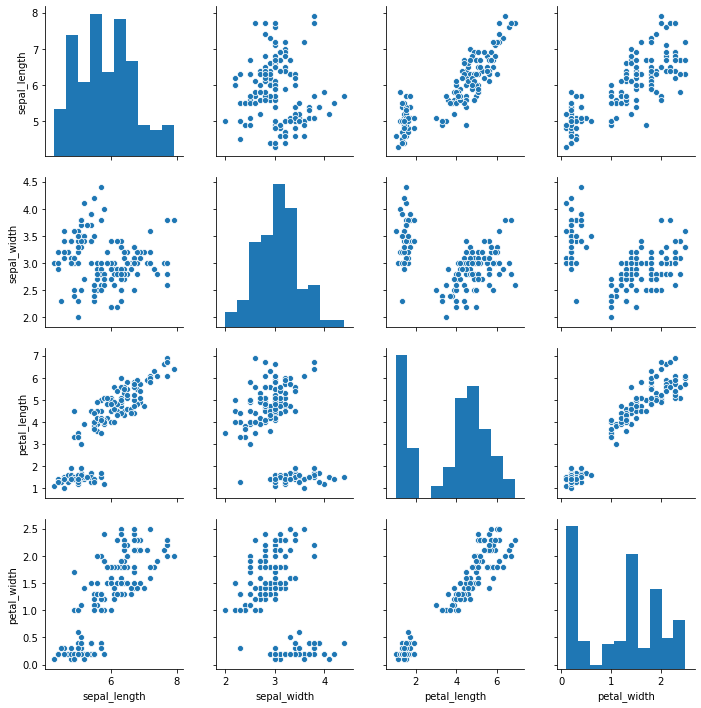

In [7]:
# library & dataset
import matplotlib.pyplot as plt
import seaborn as sns
df = sns.load_dataset('iris')
 
# with regression
sns.pairplot(df, kind="reg")
plt.show()
 
# without regression
sns.pairplot(df, kind="scatter")
plt.show()

# Dendrogram
* A dendrogram or tree diagram allows to illustrate the hierarchical organisation of several entities.

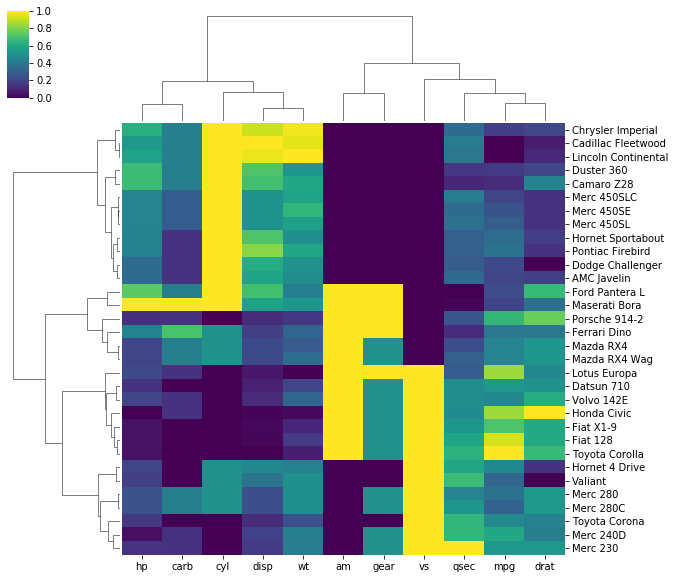

In [8]:
# Libraries
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
 
# Data set
url = 'https://python-graph-gallery.com/wp-content/uploads/mtcars.csv'
df = pd.read_csv(url)
df = df.set_index('model')
del df.index.name
df
 
# Change color palette
sns.clustermap(df, metric="euclidean", standard_scale=1, method="ward", cmap="viridis")

# Graph Structures
* Show interconnections between a set of entities. 
* Each entity is represented by a Node (or vertices). 
* Connection between nodes are represented through links (or edges).
* Directed or undirected, weighted or unweighted.

True
Configuration model
Degree sequence [5, 3, 3, 3, 3, 2, 2, 2, 1, 1, 1]
Degree histogram
degree #nodes
5 1
3 4
2 3
1 3


/Users/joshuaagar/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


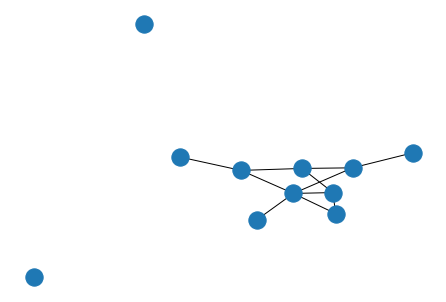

In [9]:
#!/usr/bin/env python
"""
===============
Degree Sequence
===============
Random graph from given degree sequence.
"""
# Author: Aric Hagberg (hagberg@lanl.gov)
# Date: 2004-11-03 08:11:09 -0700 (Wed, 03 Nov 2004)
# Revision: 503

#    Copyright (C) 2004-2019 by
#    Aric Hagberg <hagberg@lanl.gov>
#    Dan Schult <dschult@colgate.edu>
#    Pieter Swart <swart@lanl.gov>
#    All rights reserved.
#    BSD license.

import matplotlib.pyplot as plt
from networkx import nx

z = [5, 3, 3, 3, 3, 2, 2, 2, 1, 1, 1]
print(nx.is_graphical(z))

print("Configuration model")
G = nx.configuration_model(z)  # configuration model
degree_sequence = [d for n, d in G.degree()]  # degree sequence
print("Degree sequence %s" % degree_sequence)
print("Degree histogram")
hist = {}
for d in degree_sequence:
    if d in hist:
        hist[d] += 1
    else:
        hist[d] = 1
print("degree #nodes")
for d in hist:
    print('%d %d' % (d, hist[d]))

nx.draw(G)
plt.show()

# Guiding Principals

# Cutting the Y-axis/suppressing the zero
* **Bad** when using a bar chart or physical quantity based at zero
* **Good** when the reference point and all of the values are greater than zero
![title](images/Bar_Chart.jpeg)

# Pie Charts
* Never use them ... people are not good at determining angles
![title](images/pie_chart_1.png)

![title](images/bar_chart_1.png)

# Overplotting
Make sure the density of datapoints is visible!
![title](images/overplotting_1.png)

![title](images/overplotting_2.png)

![title](images/overplotting_3.png)

# Plots with multiple lines
* Generally it is hard to extract information from these graphs
* Can be used if only one piece of information is most important
* Can be used if the scales are similar

![title](images/two_lines_1.png)

![title](images/two_lines_2.png)

![title](images/two_lines_3.png)

![title](images/two_lines_4.png)

# 3D graphics
While 3D might look cool ... it is nearly impossible to extract information

# Don't: 3D bar charts
Information is hidden in 3D space
![title](images/3d_1.png)

# Don't: Fixed 3D scatter plots
You cannot see the data
![title](images/3d_2.png)

## Maybe if the graph is interactive

In [15]:
import plotly.express as px
iris = px.data.iris()
fig = px.scatter_3d(iris, x='sepal_length', y='sepal_width', z='petal_width',
                    color='petal_length', symbol='species')
fig.show()

# Don't: Add dimensions to the data when they do not exist

In [11]:
!pip install plotly
import plotly.graph_objects as go

import pandas as pd

# Read data from a csv
z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')

fig = go.Figure(data=[go.Surface(z=z_data.values)])

fig.update_layout(title='Mt Bruno Elevation', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()


In [1]:
# Libraries
from IPython.display import IFrame
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde

In [1]:
# Libraries
from IPython.display import IFrame
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde

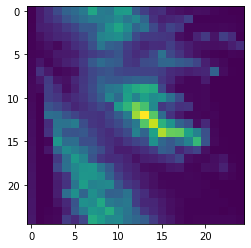

In [12]:
import matplotlib.pyplot as plt 

plt.imshow(z_data.values)

# Use it when absolutely necessary
![figure](images/adma201702069-fig-0002-m.jpg)

# WTF Graphs

In [13]:
IFrame(src='https://viz.wtf/', width=1000, height=1000)

# Places for Inspiration
![figure](images/inspiration_1.jpg)

# Uber
Some information is best demonstrated interactivly
* Faster pickup times mean more drivers are idle
* Can always add an interactive graphic in supplemental materials 

In [14]:
IFrame(src='https://getdolphins.com/wp-content/uploads/2018/02/uber.gif', width=700, height=400)